## Contributing to the Image Selection

We have chosen 49 large .tif files in the 1/3 arcsecond resolution, in the USA, from which we would like to select smaller images for training. 

- The raw, large images, have already been processed in the following way:

- 1. Created Masks
- 2. Split images and their masks into smaller images
- 3. Removed invalid images (those that had values below -9999)
- 4. Removed most of empty images (just background) while keeping ~20%.
- 5. After processing, saved in the data/intermediate/ directory

**Next**: The selected 49 large images are not the only ones that have been processed, all 1/3 data has been processed in this way.

- For the 49 .tifs that we want, we split them into smaller lists, so that user does not process all at a time.
- User can now take such smaller list, and tell the code to only select ot of those images that have this file ID.
- This basically means, we only choose out of all images those, that come from the 49 larger images that we chose.
- As long as two users do not use the same small list of the file IDs, they can work at the same time. 
- Note by file ID I mean its original name without suffix, eg: 'USGS_13_n40w095_20240228'.

**Code below**: allows to go through those images and select:

(keyboard input)

- (a) keep image if its good
- (w) give image a higher weighting
- (d) remove image
- (q) quit 

Note: code checks for image overlap with all the previously chosen images before presenting current image to the user, so sometimes it might say something like: image rejected due to overlap 17%, and it will go to the next image. The threshold for acceptance is currently set to 10%.

**Note: dilation is only for plotting**, the actual images that go into processed are not dilated, the levees remain one pixel thick.

**To contribute, simply select a list of file IDs, adjust the file_ids_I_want_to_process and run the two cells below:**

In [83]:
list_0 = ['USGS_13_n40w095_20240228', 'USGS_13_n35w119_20240207', 'USGS_13_n39w122_20240313', 'USGS_13_n33w098_20211124', 'USGS_13_n41w075_20221115']
list_1 = ['USGS_13_n31w095_20240229', 'USGS_13_n34w118_20190917', 'USGS_13_n40w096_20240228', 'USGS_13_n42w076_20230227', 'USGS_13_n40w087_20210617']
list_2 = ['USGS_13_n31w096_20240229', 'USGS_13_n41w113_20241031', 'USGS_13_n38w123_20240826', 'USGS_13_n41w112_20241031', 'USGS_13_n46w123_20240124']
list_3 = ['USGS_13_n38w122_20240207', 'USGS_13_n35w107_20231208', 'USGS_13_n34w098_20250102', 'USGS_13_n36w091_20241002', 'USGS_13_n42w074_20241010']
list_4 = ['USGS_13_n35w118_20221019', 'USGS_13_n39w091_20240228', 'USGS_13_n42w097_20230210', 'USGS_13_n33w117_20240327', 'USGS_13_n39w095_20240408']
list_5 = ['USGS_13_n48w123_20240327', 'USGS_13_n40w085_20230407', 'USGS_13_n34w097_20250102', 'USGS_13_n33w118_20180313', 'USGS_13_n42w089_20241107']
list_6 = ['USGS_13_n30w096_20240229', 'USGS_13_n33w097_20211124', 'USGS_13_n40w105_20230602', 'USGS_13_n40w076_20220524', 'USGS_13_n34w117_20240327']
list_7 = ['USGS_13_n34w112_20240402', 'USGS_13_n47w097_20241024', 'USGS_13_n42w096_20221218', 'USGS_13_n42w088_20241107', 'USGS_13_n36w078_20151125']
list_8 = ['USGS_13_n43w089_20241107', 'USGS_13_n40w106_20230602', 'USGS_13_n36w107_20240416', 'USGS_13_n41w074_20240925', 'USGS_13_n41w076_20221115']
list_9 = ['USGS_13_n40w075_20210624', 'USGS_13_n34w113_20241016', 'USGS_13_n29w082_20221103', 'USGS_13_n27w081_20221103']

In [ ]:
# replace with your actual list
file_ids_I_want_to_process = list_9999

Note: not sure if output_dir in Marco's directory will work for everyone, but it can be changed to user's personal directory if necessary and then we can combine into one.

Image passed overlap check.
Progress: 25/92 

Currently Processing: ../data/intermediate/tutorial_data/1m_544/images/20_79cd87b784.tif


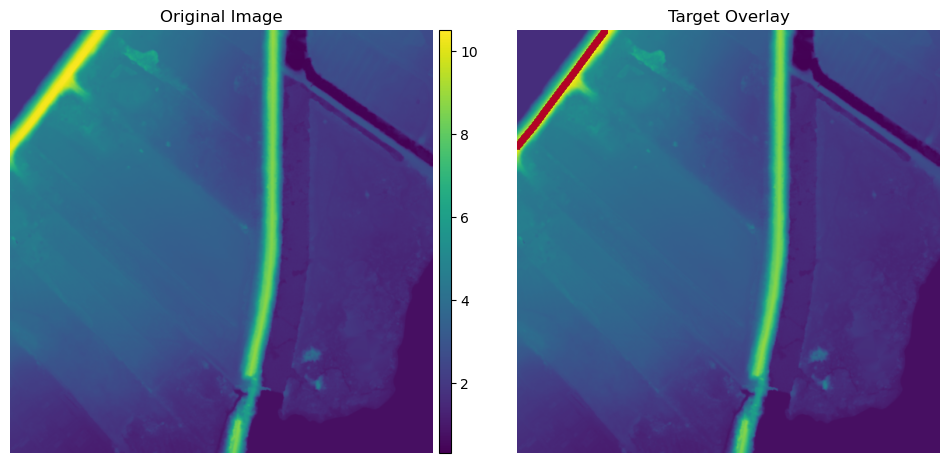

In [ ]:
from levee_hunter.processing.dataset_images_choice import interactive_images_selection

# please note, the dilation_size is only for visualisation.
# powernorm_threshold means that if the scale on image is high, the image will be plotted with powernorm scale
# effect sort of like log scale
interactive_images_selection(
    intermediate_data_path="/share/gpu5/ucapmgb/levee-hunter/data/intermediate/13_636", # do not change this
    output_dir='/share/gpu5/ucapmgb/levee-hunter/data/processed/',                # adjust if needed
    dilation_size=7,         # for visualisation only, choose your preference
    figsize=(12, 6),         # for visualisation only
    cmap='viridis',          # for visualisation only
    plot_overlay=True,       # for visualisation only
    file_ids_toprocess=file_ids_I_want_to_process,
    powernorm_threshold=40,  # for visualisation only
    )